In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pybiomart
from utils import bootstrap_filter, get_clust

Load data from disc.

In [178]:
data = pd.read_csv('table_expression_level.csv', sep='\t').set_index('gene_name')
data.index.name = None
data = data.T

Drop genes with constant expression.

In [179]:
data = data.loc[:, (data != data.iloc[0]).any()]

Drop genes with identical expression (the first one will be kept).

In [180]:
data = data.drop_duplicates()
data = data.T.drop_duplicates().T

In [181]:
data

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC010980.1,AC007511.1,AC004233.4,AC092910.4,AC073611.1,AC078856.1,AC008763.4,AL592295.6,AL391628.1,AP006621.6
0180b8ef-dbca-4edd-bce1-3f793f354f13,23.3626,0.0000,170.5331,12.8323,50.4408,3.4109,2.5675,55.0321,17.9605,59.9287,...,1.9150,0.0,0.0000,0.0000,0.2568,0.0000,0.0000,10.0045,0.0179,0.9736
01d381c7-6398-47cb-925c-078cd538852f,147.4161,0.0000,100.2642,6.7916,3.6318,12.5037,8.6328,66.3151,41.1018,20.2152,...,0.0000,0.0,0.1058,0.0000,0.2968,0.0000,0.0000,5.1484,0.0160,1.0068
0240ae8f-9354-4123-b791-5333317ae9f0,224.8230,0.0964,100.7773,6.8042,10.2292,5.8085,11.1579,37.9584,22.3568,18.3961,...,0.0000,0.0,0.3916,0.0000,0.6369,0.0000,0.0000,7.6020,0.0740,1.1015
047dc5b6-c15e-4dad-b753-de55ca6e171c,17.4730,0.0000,89.6900,2.4075,1.9901,4.6685,28.7088,86.7494,12.5525,17.8846,...,0.1581,0.0,0.0000,0.0000,0.1783,0.0000,0.0000,5.5367,0.0081,1.3492
048da4d7-cab0-49c5-8bc9-78b1bf0b365b,67.7678,0.1053,105.9543,1.8862,2.3440,5.9077,11.4861,58.5412,5.1690,8.3026,...,0.0786,0.0,0.1069,0.0000,0.2046,0.0000,0.0000,4.0872,0.0162,1.4808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdd30c10-1cff-49c4-8acc-a1fc9f3dda83,112.1238,0.1560,190.6818,8.3874,15.7910,8.0355,21.2798,83.1345,89.7032,87.2034,...,1.5525,0.0,0.3168,1.2795,0.3906,0.0000,0.0000,12.1505,0.0878,0.4570
ff3910aa-45a9-42b9-a988-f35a7bb401fa,49.4676,0.0000,174.7058,5.0369,5.0058,19.2612,34.3354,86.9792,10.7342,54.2526,...,0.0000,0.0,0.1155,0.0000,0.1178,0.0000,0.0000,6.4109,0.0349,0.6496
ff6b582d-e2ac-4cca-b436-8e886e6cb518,32.3802,0.0000,196.8833,3.6681,9.6311,20.3795,40.6909,110.7877,17.1606,40.5954,...,0.0621,0.0,0.1267,0.0000,0.4527,0.0000,0.0000,2.0397,0.0479,1.7551
ff721df7-5306-47c6-a5ee-e771678decbd,90.1769,0.0685,72.2489,5.6081,2.0988,35.1666,32.9609,83.2519,22.2662,21.3179,...,0.2043,0.0,0.0000,0.0000,0.6206,1.6565,0.0253,7.6052,0.0210,1.1428


Выбираем только белок-кодирующие гены

In [182]:
dataset = pybiomart.Dataset(name='hsapiens_gene_ensembl', host='http://www.ensembl.org')
genes = dataset.query(attributes=['external_gene_name', "chromosome_name", "transcript_biotype"])
protein_coding = genes[genes['Transcript type'] == 'protein_coding']
protein_coding = protein_coding[protein_coding['Chromosome/scaffold name'].isin([str(i) for i in range(0, 23)])]
proteins = protein_coding['Gene name']

In [183]:
protein_keys = list(proteins.dropna())
len(protein_keys)

18411

In [184]:
data = data.T.loc[~data.T.index.duplicated(), :].T
data = data.filter(items = protein_keys, axis = 1)
data

,PARP4,MIPEP,KATNAL1,UBE2L5,CCNA1,USPL1,URAD,HMGB1,SOHLH2,GPALPP1,...,PI4KB,RFX5,SELENBP1,PSMB4,CGN,TUFT1,POGZ,RPS6KA1,OR4F29,DHDDS
0180b8ef-dbca-4edd-bce1-3f793f354f13,60.6867,38.5967,9.7443,0.0259,0.0765,12.5813,0.0000,279.5359,0.0000,6.2806,...,148.2220,104.3436,8.7424,1025.3439,6.8963,33.8309,42.7467,44.4626,0.0,39.4820
01d381c7-6398-47cb-925c-078cd538852f,43.2970,20.9690,0.6116,0.1854,0.0683,6.9310,0.0000,68.3844,0.0457,6.1413,...,52.7606,37.2025,48.4410,302.9499,77.3046,53.0749,17.4582,22.0179,0.0,23.4717
0240ae8f-9354-4123-b791-5333317ae9f0,35.4050,15.3989,1.5068,0.0644,0.0632,10.7908,0.0736,67.4665,0.7196,9.0856,...,70.4707,14.6100,7.7605,279.8773,48.3681,50.7843,24.6048,11.1650,0.0,27.1349
047dc5b6-c15e-4dad-b753-de55ca6e171c,11.2401,6.7366,3.3572,0.1885,9.1323,4.0569,0.0000,58.6121,0.0465,2.7900,...,46.8892,22.2220,4.2949,529.0077,1.2287,12.5569,8.6806,59.3662,0.0,18.6766
048da4d7-cab0-49c5-8bc9-78b1bf0b365b,17.6635,10.4866,1.5982,0.0469,0.4490,5.4458,0.0000,82.9451,0.0231,3.5996,...,46.7084,8.7727,8.2976,460.4933,44.0182,44.7652,10.8829,13.2258,0.0,13.5440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdd30c10-1cff-49c4-8acc-a1fc9f3dda83,44.3615,9.2902,1.1461,0.1851,0.0341,16.8667,0.0000,86.7141,1.8719,9.8705,...,124.0036,40.8198,53.9767,401.4016,122.6723,102.8995,37.3001,38.7497,0.0,65.2836
ff3910aa-45a9-42b9-a988-f35a7bb401fa,35.3533,16.2290,5.4238,0.2024,0.1492,8.4682,0.0000,88.7117,0.0499,4.2120,...,87.4838,42.4609,6.4480,693.0502,13.5637,39.8079,24.9855,41.9582,0.0,20.6719
ff6b582d-e2ac-4cca-b436-8e886e6cb518,30.7704,13.1362,8.1071,0.0833,13.9996,12.2618,0.0000,89.7130,0.0274,3.5610,...,44.4674,38.4960,5.4873,400.4449,4.2061,23.7131,18.8921,41.4207,0.0,20.8506
ff721df7-5306-47c6-a5ee-e771678decbd,69.1100,17.2092,0.9150,0.0914,0.0449,10.2527,0.0000,108.6897,0.5408,8.3787,...,42.7084,15.7284,8.6920,407.0929,36.0602,36.9745,18.2850,45.0286,0.0,12.9914


Посмотрим на распределение по коэффиценту вариации

C:\Users\syak1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

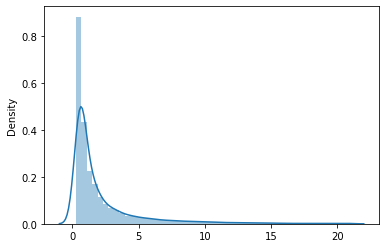

In [185]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
data_cv = cv(data)
sns.distplot(data_cv)


Отрежем 10% генов с самыми маленькими коэффицентами вариации

In [186]:
ten_quartile_keys = data_cv[data_cv>data_cv.quantile(0.1)].index
data = data.filter(items = ten_quartile_keys, axis = 1)
data

,PARP4,MIPEP,KATNAL1,UBE2L5,CCNA1,USPL1,URAD,SOHLH2,GPALPP1,HSPH1,...,ZNF687,PI4KB,RFX5,SELENBP1,PSMB4,CGN,TUFT1,POGZ,RPS6KA1,OR4F29
0180b8ef-dbca-4edd-bce1-3f793f354f13,60.6867,38.5967,9.7443,0.0259,0.0765,12.5813,0.0000,0.0000,6.2806,106.6671,...,54.6959,148.2220,104.3436,8.7424,1025.3439,6.8963,33.8309,42.7467,44.4626,0.0
01d381c7-6398-47cb-925c-078cd538852f,43.2970,20.9690,0.6116,0.1854,0.0683,6.9310,0.0000,0.0457,6.1413,42.1679,...,25.9327,52.7606,37.2025,48.4410,302.9499,77.3046,53.0749,17.4582,22.0179,0.0
0240ae8f-9354-4123-b791-5333317ae9f0,35.4050,15.3989,1.5068,0.0644,0.0632,10.7908,0.0736,0.7196,9.0856,53.5234,...,11.8175,70.4707,14.6100,7.7605,279.8773,48.3681,50.7843,24.6048,11.1650,0.0
047dc5b6-c15e-4dad-b753-de55ca6e171c,11.2401,6.7366,3.3572,0.1885,9.1323,4.0569,0.0000,0.0465,2.7900,24.3590,...,15.1160,46.8892,22.2220,4.2949,529.0077,1.2287,12.5569,8.6806,59.3662,0.0
048da4d7-cab0-49c5-8bc9-78b1bf0b365b,17.6635,10.4866,1.5982,0.0469,0.4490,5.4458,0.0000,0.0231,3.5996,29.6666,...,12.9694,46.7084,8.7727,8.2976,460.4933,44.0182,44.7652,10.8829,13.2258,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdd30c10-1cff-49c4-8acc-a1fc9f3dda83,44.3615,9.2902,1.1461,0.1851,0.0341,16.8667,0.0000,1.8719,9.8705,117.5731,...,48.9941,124.0036,40.8198,53.9767,401.4016,122.6723,102.8995,37.3001,38.7497,0.0
ff3910aa-45a9-42b9-a988-f35a7bb401fa,35.3533,16.2290,5.4238,0.2024,0.1492,8.4682,0.0000,0.0499,4.2120,79.1730,...,38.6540,87.4838,42.4609,6.4480,693.0502,13.5637,39.8079,24.9855,41.9582,0.0
ff6b582d-e2ac-4cca-b436-8e886e6cb518,30.7704,13.1362,8.1071,0.0833,13.9996,12.2618,0.0000,0.0274,3.5610,81.5686,...,16.3043,44.4674,38.4960,5.4873,400.4449,4.2061,23.7131,18.8921,41.4207,0.0
ff721df7-5306-47c6-a5ee-e771678decbd,69.1100,17.2092,0.9150,0.0914,0.0449,10.2527,0.0000,0.5408,8.3787,89.2344,...,20.1968,42.7084,15.7284,8.6920,407.0929,36.0602,36.9745,18.2850,45.0286,0.0


C:\Users\syak1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

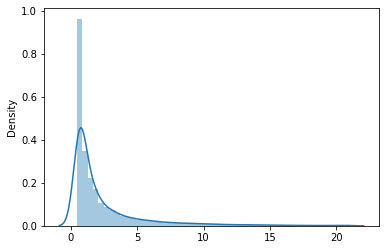

In [187]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
data_cv = cv(data)
sns.distplot(data_cv)

Drop genes with classification error less than $\frac{1}{e}$. If you have two datasets, clear both of them and use the intersection of genes.

In [188]:
clear_data = bootstrap_filter(data).copy()

The main hyperparameter to tune is the **minimum cluster size**.
The method returns two arrays with cluster labels for each gene. The first one contains clusters from the HDBSCAN. The second contains same clusters but eroded by the core decomposition. They will be much denser and smaller. The label -1 is assigned to noize genes outside any cluster.

In [201]:
clusters, core_clusters = get_clust(clear_data, min_clust_size=30, n_components = 10)

C:\Users\syak1\anaconda3\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


In [202]:
clear_data.loc[:, core_clusters != -1]

,CCNA1,POSTN,ADRA1D,ERICH6B,KL,PCDH8,BTBD3,CNMD,PCSK2,SCEL,...,CACNA1E,MASP2,CEPT1,ANGPTL7,ZNF687,PI4KB,RFX5,PSMB4,TUFT1,POGZ
0180b8ef-dbca-4edd-bce1-3f793f354f13,0.0765,8.9490,0.0860,0.0878,4.5049,0.0000,23.7886,0.1579,0.0000,0.0205,...,0.0141,0.1416,7.3733,0.0000,54.6959,148.2220,104.3436,1025.3439,33.8309,42.7467
01d381c7-6398-47cb-925c-078cd538852f,0.0683,20.9101,0.6399,0.1568,0.8502,0.0000,17.0982,0.0470,0.0875,12.8906,...,0.0042,0.1987,7.2703,0.0000,25.9327,52.7606,37.2025,302.9499,53.0749,17.4582
0240ae8f-9354-4123-b791-5333317ae9f0,0.0632,241.1408,0.2843,0.2177,0.3233,0.0000,15.7710,0.0000,0.0000,0.9140,...,0.0117,0.4681,9.0301,0.1600,11.8175,70.4707,14.6100,279.8773,50.7843,24.6048
047dc5b6-c15e-4dad-b753-de55ca6e171c,9.1323,21.3003,0.0260,0.0266,0.2315,0.0000,12.7009,0.0000,0.0000,4.9444,...,0.0128,0.0551,3.8255,0.1757,15.1160,46.8892,22.2220,529.0077,12.5569,8.6806
048da4d7-cab0-49c5-8bc9-78b1bf0b365b,0.4490,206.2517,0.2329,0.0264,0.1689,0.0604,6.9279,0.0000,0.1217,0.0370,...,0.0468,0.0548,2.7059,0.8040,12.9694,46.7084,8.7727,460.4933,44.7652,10.8829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdd30c10-1cff-49c4-8acc-a1fc9f3dda83,0.0341,1.6719,0.0000,0.1826,1.1218,0.0000,25.7375,0.0000,0.0109,0.3469,...,0.0000,2.2722,19.8443,0.0345,48.9941,124.0036,40.8198,401.4016,102.8995,37.3001
ff3910aa-45a9-42b9-a988-f35a7bb401fa,0.1492,299.9068,0.1677,0.0570,0.3150,0.0000,10.7425,0.0000,0.0000,0.5789,...,0.0092,0.2958,8.7954,0.0377,38.6540,87.4838,42.4609,693.0502,39.8079,24.9855
ff6b582d-e2ac-4cca-b436-8e886e6cb518,13.9996,341.7270,0.3374,0.0939,0.1456,0.0000,12.1615,0.0000,0.0393,0.0657,...,0.0706,0.2814,6.2830,0.1243,16.3043,44.4674,38.4960,400.4449,23.7131,18.8921
ff721df7-5306-47c6-a5ee-e771678decbd,0.0449,0.3699,0.0673,0.1030,0.3193,0.0000,15.6569,0.1235,0.0144,0.5287,...,0.0000,0.3323,4.5014,0.0000,20.1968,42.7084,15.7284,407.0929,36.9745,18.2850
